<a href="https://colab.research.google.com/github/Moshiko-sh/Diabetes_simple/blob/main/Copy_of_diabetes_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:Orange;"><center>Pima Indians Diabetes - A Simple notebook for course exam</center></h1>

מגיש משה שמן 208789412

#### 1.2 Data Dictionary <a id=3></a>
`Pregnancies` - Number of times pregnant

`Glucose` - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

`BloodPressure` - Diastolic blood pressure (mm Hg)

`SkinThickness` - Triceps skin fold thickness (mm)

`Insulin` - 2-Hour serum insulin (mu U/ml)

`BMI` - Body mass index

`DiabetesPedigreeFunction` - Diabetes pedigree function

`Age` - Age (years)

`Outcome` - Class variable (0 or 1)

#### 1.3 Task <a id=4></a>
To predict the onset of diabetes based on diagnostic measures.

### 2. Preparation <a id=5></a>

#### 2.1 Packages <a id=6></a>

In [ ]:
! pip install scikit-optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandas.io.pytables import DataCol# הוספת ספריות
import pandas as pd
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.9 MB/s eta 0:00:00


#### 2.2 Data <a id=7></a>

In [ ]:
from pandas.io.pytables import DataCol# הוספת ספריות
import pandas as pd
from google.colab import files
data = files.upload()
data = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes (5).csv


In [ ]:
#Print the first 5 rows of the dataframe.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**הגדרת מאפיינים **

הצגה כללית על DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


בדיקה האם אין ערכים חסרים בדאטא

In [ ]:
# Checking if there are any null values in the dataset or not
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

ניתן לראות כי אין ערכים חסרים

בדיקת כמות אפסים אם יהיה צורך נטפל

In [ ]:
features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


**מאפיינים נומרים **

מאפיינים נומריים (Numeric Attributes): אלו הם מאפיינים שמכילים ערכים מספריים, כמו מספרים שלמים (integer) ומספרים עשרוניים (floating-point). לדוגמה, גיל, כמות, מחיר וכו'.

In [ ]:
# בחירת העמודות הנומריות
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# הצגת העמודות הנומריות
print(numeric_columns)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

מידע ססטסטי על העמודות הנומריות

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


מאפיינים אלפא-נומריים (Alphanumeric Attributes): אלו הם מאפיינים שמכילים טקסט ותווים. כאשר הם אינם מיועדים לביטוי של ערכים מספריים, כמו שמות, מותגים, תיאורים וכו'.

In [ ]:
# בחירת העמודות האלפא-נומריות
alphanumeric_columns = data.select_dtypes(include=['object'])

# הצגת העמודות האלפא-נומריות
print(alphanumeric_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[768 rows x 0 columns]


**מטריצה קורולצריה **

מטריצת הקורלציה היא כלי סטטיסטי שמשמש להערכת יחסי הקורלציה בין משתנים שונים במערך נתונים. המטריצה מציגה את רמת הקשר בין כל זוג משתנים במערך. מטריצת הקורלציה נוצרת באמצעות חישוב הקורלציה בין כל זוג משתנים במערך נתונים. זה מאפשר לנו לראות אילו משתנים קשורים זה לזה ובאילו כיוונים. המטריצה היא כלי חשוב בניתוח נתונים ומסייעת לנו לזהות את המשתנים החשובים ביותר לצורך הבנת התרחשויות בנתונים וליצירת דגמים סטטיסטיים.

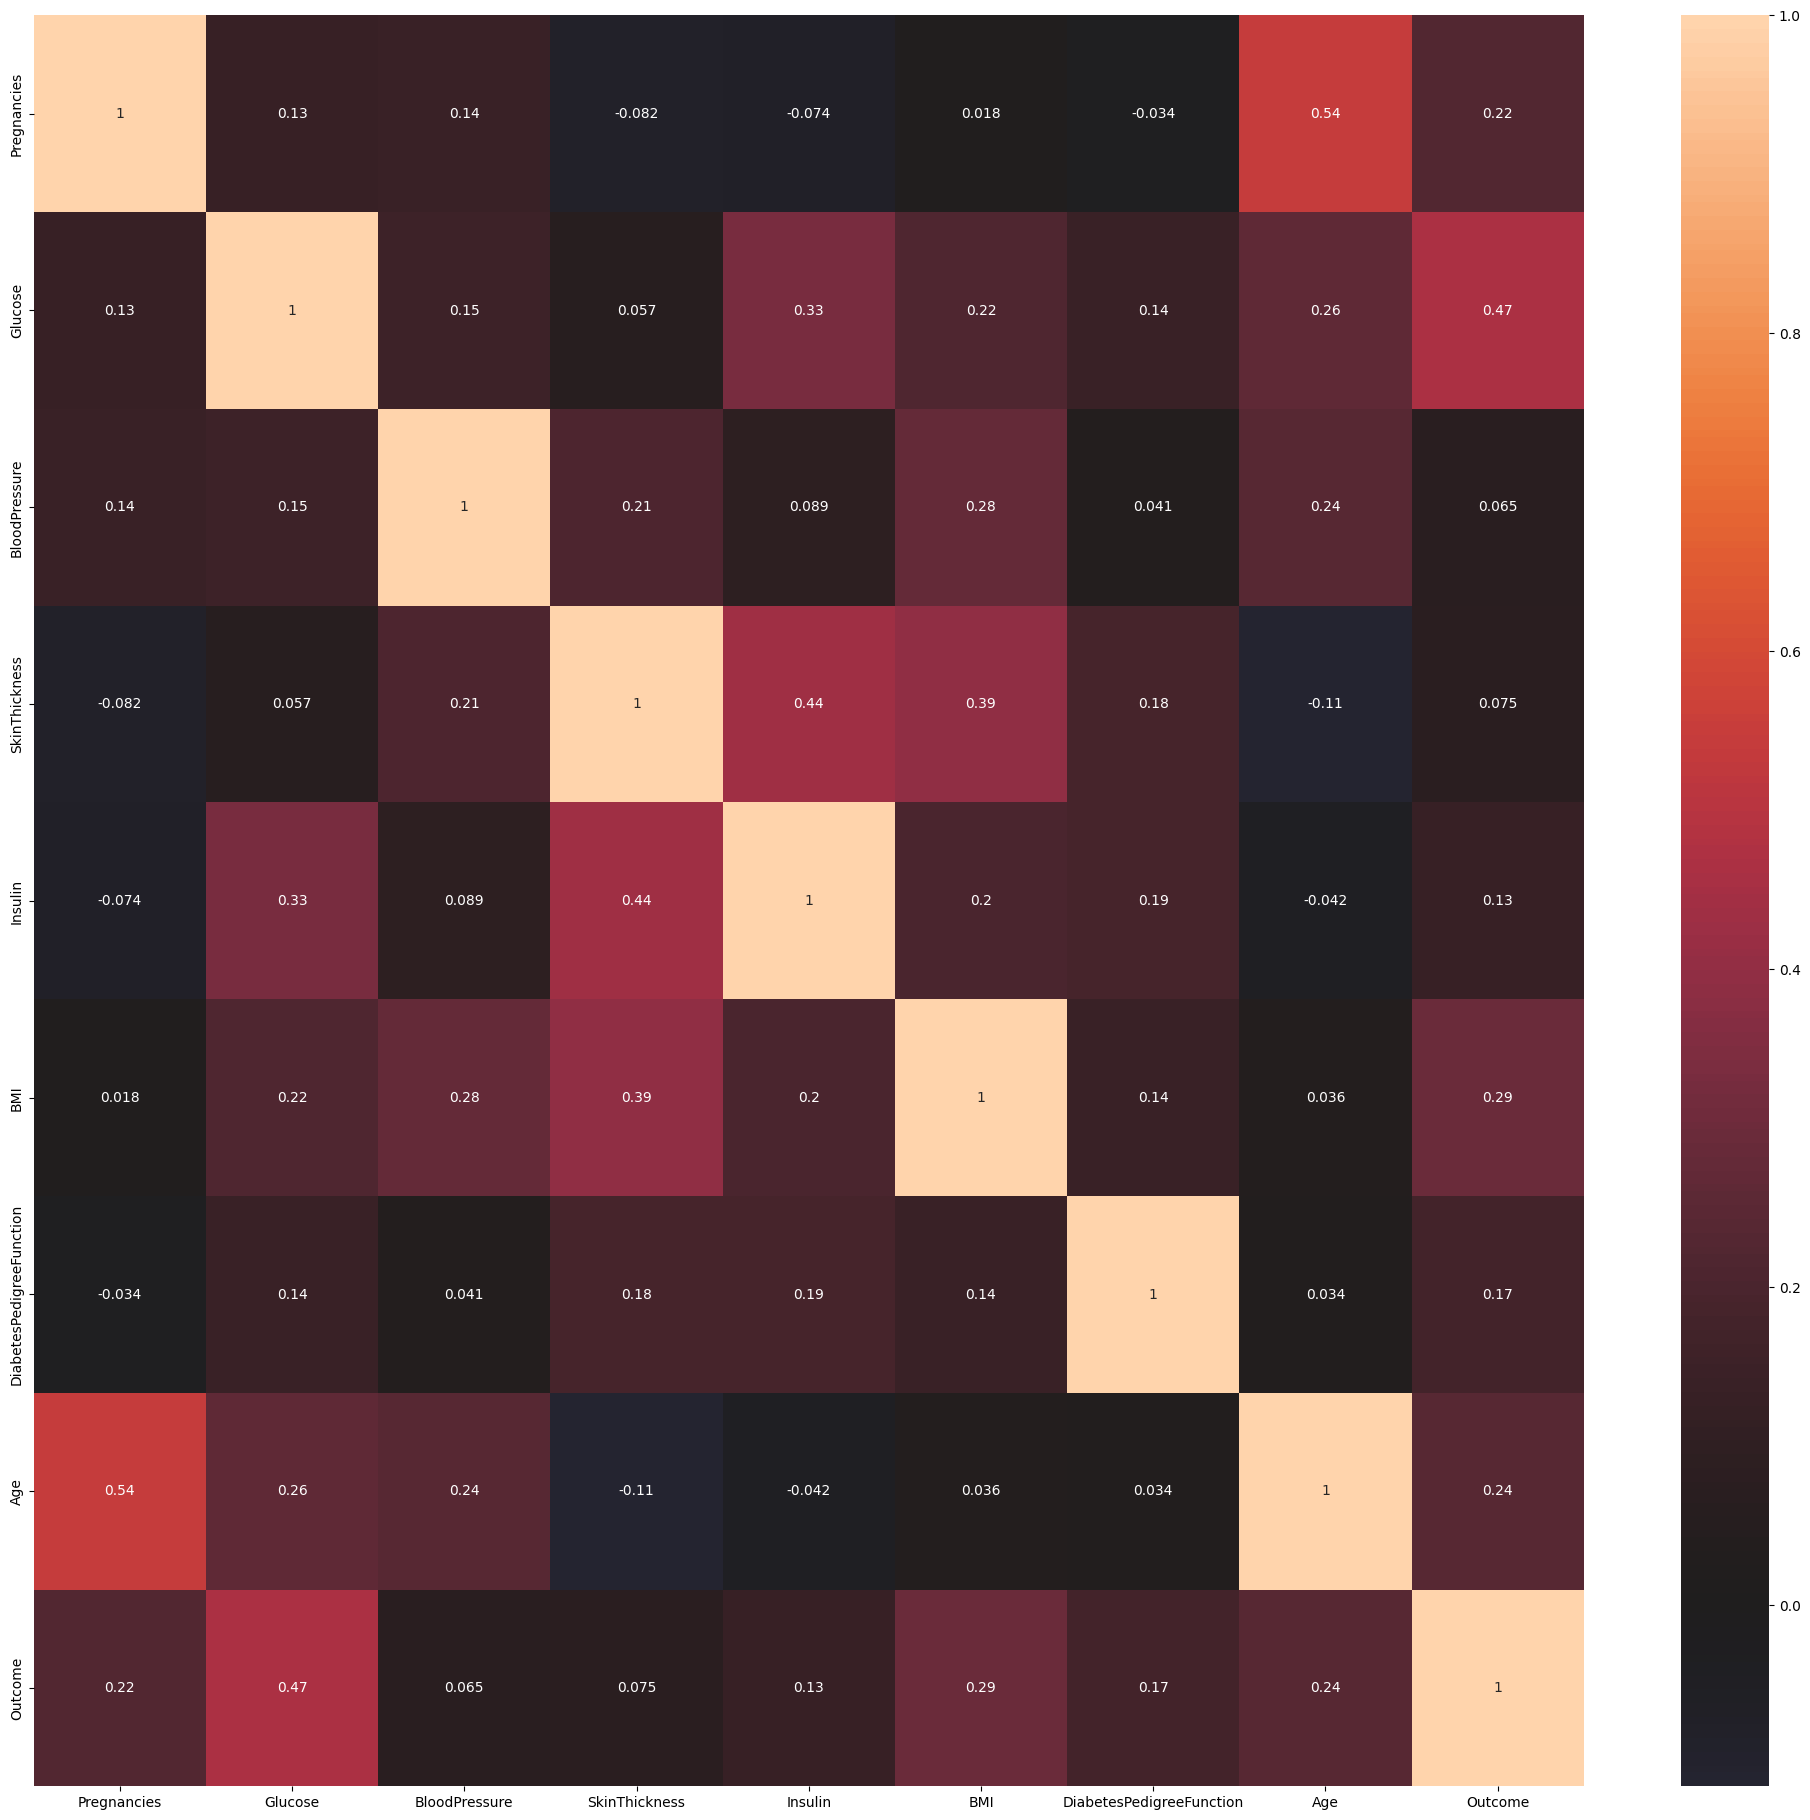

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # ייבוא המודול numpy

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(25, 23))
sns.heatmap(corr_matrix, annot=True, center=0)

plt.show()

**הדפסת משתנה המטרה **

הפרדה את הנתונים למשתני הסברה והמשתנה התלוי (Target):
הפרדה את הנתונים למשתני הסברה (Features) והמשתנה התלוי (Target). במקרה שלי, המשתנה התלוי הוא "Outcome", והמשתנים הסברה הם העמודות האחרות.

In [ ]:

con_cols = list(data.drop('Outcome',axis=1).columns)
target = ['Outcome']
print(f"The columns are : {colored(con_cols, 'yellow')}")
print(f"The target is   : {colored(target,'yellow')}")

The columns are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
The target is   : ['Outcome']


### 4. Data Preprocessing <a id=12></a>

Visualization of Target Variable

array([<Axes: ylabel='Outcome'>], dtype=object)

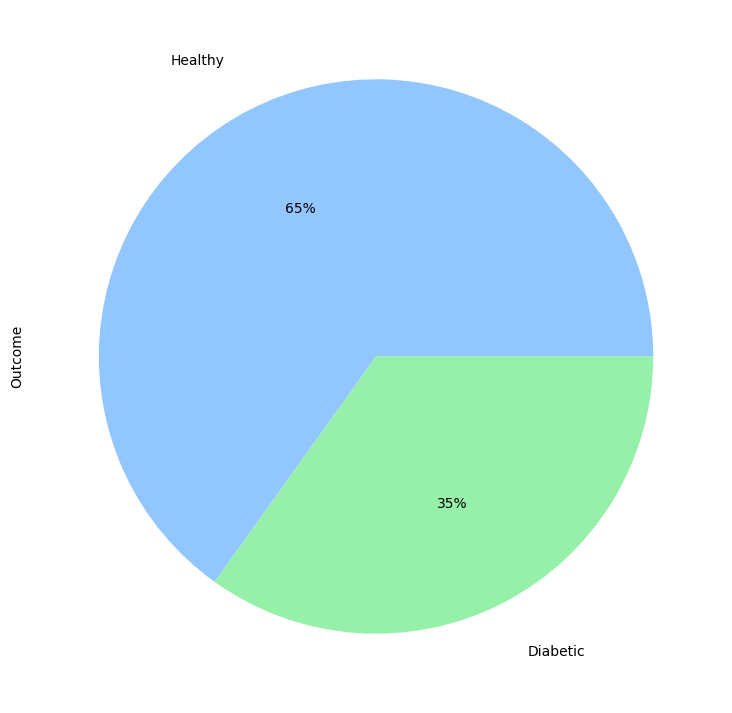

In [ ]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
data['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

Samples of diabetic people:  268
Samples of healthy people:  500


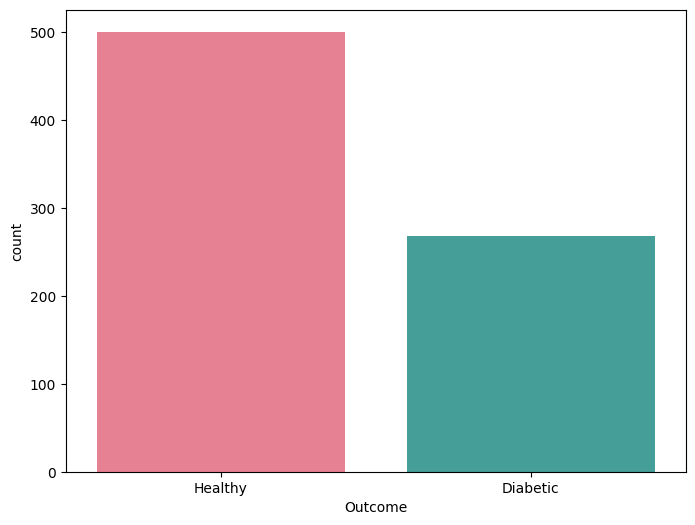

In [ ]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=data,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Samples of diabetic people: ", diabetics)
print("Samples of healthy people: ", healthy)

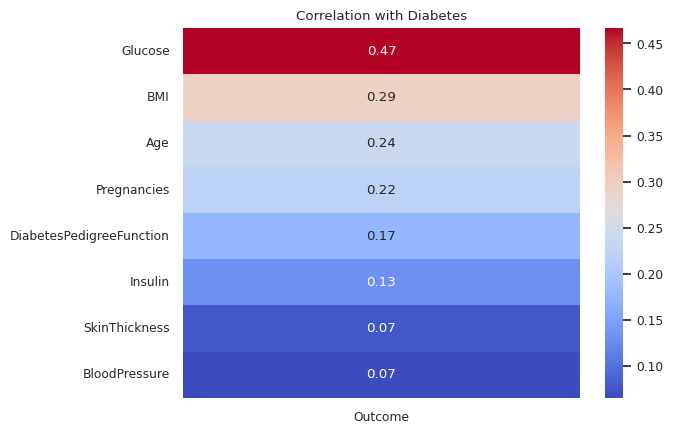

In [ ]:
corr = data.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

 בהסתכלות על תוצאות המתאם, אנו יכולים לראות שלתכונות שונות יש דרגות שונות של מתאם עם התוצאה (סוכרת).

גלוקוז: עם מתאם של 0.47, זוהי התכונה בעלת המתאם החזק ביותר עם התוצאה. זה מצביע על כך שרמות גלוקוז גבוהות יותר עשויות להיות אינדיקטור משמעותי לסוכרת.

BMI: לתכונה זו יש מתאם של 0.29 עם התוצאה. אמנם לא חזק כמו גלוקוז, אבל זה עדיין מתאם מתון, מה שמצביע על כך שמדד מסת הגוף יכול להיות גם גורם חשוב בסוכרת.

גיל: לגיל יש מתאם של 0.24 עם התוצאה. זה מצביע על כך שאנשים מבוגרים עשויים להיות בעלי סיכוי גבוה יותר ללקות בסוכרת.

הריונות: לתכונה זו יש מתאם של 0.22 עם התוצאה. זה יכול להצביע על כך שהריונות רבים יותר עלולים להגביר את הסיכון לסוכרת.

DiabetesPedigreeFunction: עם מתאם של 0.17, לתכונה זו יש מתאם קל עם התוצאה. זה מצביע על כך שהשפעות גנטיות יכולות לשחק תפקיד בסוכרת.  

אינסולין: לתכונה זו יש מתאם של 0.13 עם התוצאה. זהו מתאם חלש יחסית, המצביע על כך שרמות האינסולין לבדן אינן מנבא חזק לסוכרת.

עובי העור: עם מתאם של 0.07, לתכונה זו יש מתאם חלש מאוד עם התוצאה. זה מצביע על כך שעובי העור עשוי שלא להיות גורם משמעותי בסוכרת.

לחץ דם: לתכונה זו יש את המתאם החלש ביותר של 0.07 עם התוצאה. זה מצביע על כך שלחץ הדם לא יכול להיות גורם משמעותי בסוכרת.

**Distribution of Glucose**

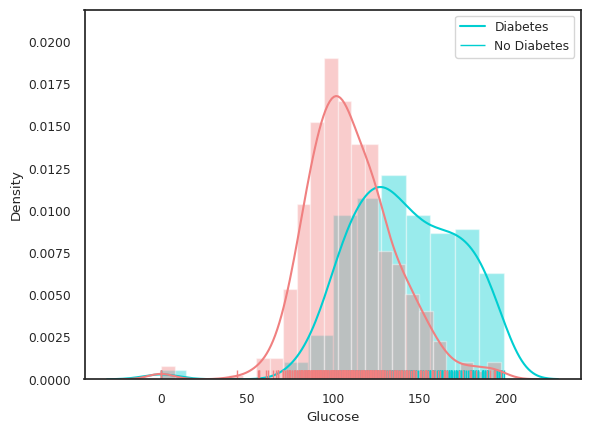

In [ ]:
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

In [ ]:
# importing the scaler
from sklearn.preprocessing import StandardScaler

# creating a copy of dataframe
df1 = data
col_cols = list(df1.columns)

# removing the target variable from the columns list
col_cols.pop()

# separating the features and target
X = df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]

# instantiating the scaler
scaler = StandardScaler()
X[col_cols] = scaler.fit_transform(X[col_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### 5. Modeling <a id=17></a>

**Random Forest Model**

#### 5.1 Packages <a id=18></a>

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

# Base Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensembling and Boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyper-parameter tuning
from functools import partial
from skopt import gp_minimize
from skopt import space
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### 5.2 Train/test split <a id=19></a>

מחלקים את הנתונים לקבוצת אימון ובדיקה:
הפרד את הנתונים לקבוצת אימון וקבוצת בדיקה כדי לאמץ את המודל על קבוצת האימון ולבדוק את ביצועיו על קבוצת הבדיקה. זה נעשה על ידי השימוש בפונקציה train_test_split.

בקוד הנ"ל, 80% מהנתונים ישמשו לאימון (X_train, y_train) ו-20% ישמשו לבדיקת ביצועי המודל (X_test, y_test).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")

The shape of X_train is      (614, 8)
The shape of X_test is       (154, 8)
The shape of y_train is      (614, 1)
The shape of y_test is       (154, 1)


**< Add here classifier and performance evaluation >**

יצור ואימון של מודל ה-**Random Forest**:
הגדר את מודל ה-Random Forest ואימן אותו על קבוצת האימון

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

הערכת ביצועי המודל:
לאחר האימון, השתמש במודל המאומן כדי לחשב מדדים ולהעריך את ביצועיו על קבוצת הבדיקה. ניתן להשתמש במדדים כמו דיוק (accuracy), מטריצת הפעולה (confusion matrix), ודוח נספח המכיל מידע נוסף על ביצועי המודל.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# מחשב את הדיוק של המודל
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# מייצר את מטריצת ההתערבות (Confusion Matrix)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# מחשב דוח מתוך הקטגוריות precision, recall, F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.73
Confusion Matrix:
[[78 21]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



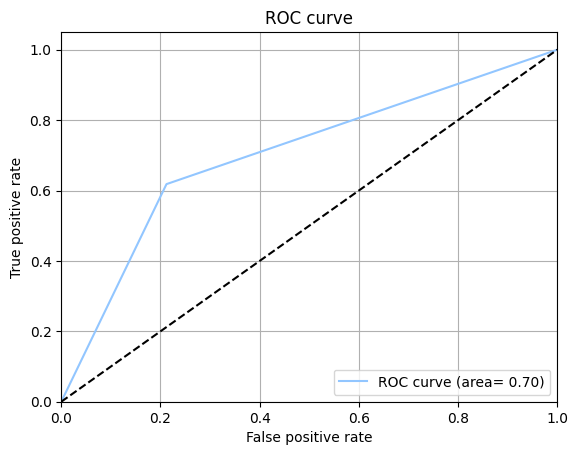

In [ ]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
# calculate AUC
roc_auc = auc(fpr, tpr)
# print('ROC AUC: %0.2f' % roc_auc)
# plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


הנה הסבר קצר על התוצאות המרכזיות:

דיוק (Accuracy): מדד המראה את היחס בין התגובות הנכונות לסך כל התגובות. דיוק גבוה מראה על ביצועים טובים. אותו תוצאה מוצגת בצורה ספציפית בקוד.

מטריצת ההתערבות (Confusion Matrix): מציגה את התוצאות המספריות של המודל. בתאים שלה, יש ארבעה תאים: True Positive (TP), True Negative (TN), False Positive (FP), ו-False Negative (FN). הם מסייעים להבין אילו סוגי שגיאות המודל עשה ובאילו נגוע.

דוח סיווג (Classification Report): מציין את דיוקים אחרים כמו precision, recall, ו-F1-score בכל קטגוריה (במקרה שלנו, סטטוס סוכרת - חיובי או שלילי). Precision מציין את היחס בין התגובות הנכונות לסך כל התגובות שהמודל זיהה כחיוביות בקטגוריה. Recall מציין את היחס בין התגובות הנכונות לסך כל התגובות שבאמת היו חיוביות בקטגוריה. F1-score הוא מדד שמשלב את precision ו-recall ומספק תמונה משולבת של ביצועי המודל בקטגוריה.

**עוד הצגה גרפית **

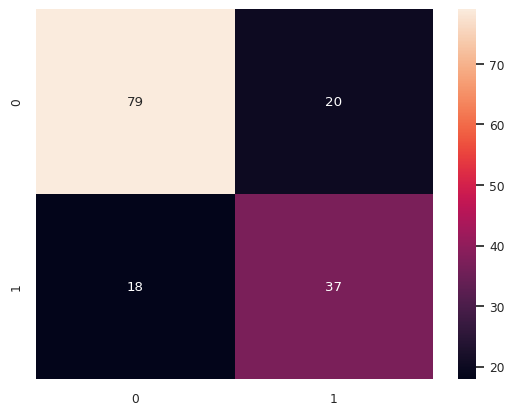

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # or any other classifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load or define your machine learning model and train it (if not already done)
model = LogisticRegression()  # Example: Replace with your model
model.fit(X_train, y_train)    # Train your model with training data

# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))


**<Add here classifier and performance evaluation>**